Partial derivatives of the cost function can be extended to the gradient vector to compute them all in one go[1].

Equation 4-5. Partial derivatives of the cost function

$$
\frac{\delta}{\delta\theta_j}MSE(\theta)=\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}-y^{(i)}\right)x_j^{(i)}
$$

Equation 4-6. Gradient vector of the cost function

$$
\nabla MSE(\theta)=
\begin{pmatrix}
\frac{\delta}{\delta\theta_0} MSE(\theta) \\
\frac{\delta}{\delta\theta_1} MSE(\theta) \\
\cdots \\
\frac{\delta}{\delta\theta_n} MSE(\theta)
\end{pmatrix} \\ =
\begin{pmatrix}
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}-y^{(i)}\right)x_0^{(i)} \\
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}-y^{(i)}\right)x_1^{(i)} \\
\cdots \\
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}-y^{(i)}\right)x_j^{(i)} \\
\end{pmatrix}\\ =
\begin{pmatrix}
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}x_0^{(i)}-y^{(i)}x_0^{(i)}\right) \\
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}x_1^{(i)}-y^{(i)}x_1^{(i)}\right) \\
\cdots \\
\frac{2}{m}\sum\limits_{i=1}^{m}\left(\theta^\top X^{(i)}x_j^{(i)}-y^{(i)}x_j^{(i)}\right) \\
\end{pmatrix}\\ =
\frac{2}{m}
\begin{pmatrix}
\theta^{\top}X^{\top}X_0-y^{\top}X_0\\
\theta^{\top}X^{\top}X_1-y^{\top}X_1\\
\cdots \\
\theta^{\top}X^{\top}X_j-y^{\top}X_j\\
\end{pmatrix} \\
=
\frac{2}{m}
\begin{pmatrix}
(\theta^{\top}X^{\top}-y^{\top})X_0\\
(\theta^{\top}X^{\top}-y^{\top})X_1\\
\cdots \\
(\theta^{\top}X^{\top}-y^{\top})X_j\\
\end{pmatrix} \\
=
\frac{2}{m}
\left(X^{\top}\left(\theta^{\top}X^{\top}-y^{\top}\right)^{\top}
\right) \\
=
\frac{2}{m}
X^{\top}\left(X\theta-y\right)
$$
, where n is the number of features, $\theta$ is the model's parameter vector, $X_j$ is column j of $X$, m is the number of instances in the dataset and $y$ is the vector of target values

References:
[1] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurelien Geron

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.91933319],
       [2.93129714]])

In [5]:
X_new = np.array([[0], [2]])

In [6]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [7]:
y_predict = X_new_b.dot(theta_best)

In [8]:
y_predict

array([[3.91933319],
       [9.78192747]])

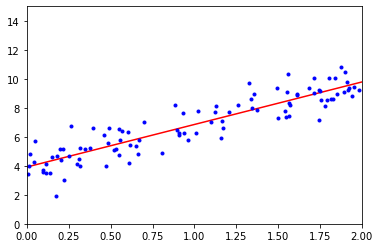

In [9]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lin_reg.intercept_, lin_reg.coef_

(array([3.91933319]), array([[2.93129714]]))

In [12]:
lin_reg.predict(X_new)

array([[3.91933319],
       [9.78192747]])

In [13]:
theta_best_svd, redisuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [14]:
theta_best_svd

array([[3.91933319],
       [2.93129714]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[3.91933319],
       [2.93129714]])

In [16]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [17]:
theta

array([[3.91933319],
       [2.93129714]])

In [18]:
X_b.T.dot(X_b).dot(theta)

array([[682.60848379],
       [797.35425364]])

In [19]:
X_b.T.dot(y)

array([[682.60848379],
       [797.35425364]])